In [21]:
from __future__ import division
from numpy.fft import rfft
from numpy import argmax, mean, diff, log
from matplotlib.mlab import find
from scipy.signal import blackmanharris, fftconvolve
from time import time
import sys
try:
    import soundfile as sf
except ImportError:
    from scikits.audiolab import flacread

ModuleNotFoundError: No module named 'scikits'

## YIN algorithm, implemented in Aubio: https://aubio.org/

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import aubio

ModuleNotFoundError: No module named 'aubio'

In [23]:
# YIN pitches
filename='avmMa.wav'
downsample = 1
samplerate = 0
win_s = 1764 // downsample # fft size
hop_s = 441 // downsample # hop size
s = aubio.source(filename, samplerate, hop_s)
samplerate = s.samplerate
tolerance = 0.1

start_time = time()
pitch_o = aubio.pitch("yin", win_s, hop_s, samplerate) 
#pitch_o.set_unit("midi")
pitch_o.set_tolerance(tolerance)

pitchesYIN = []
confidences = [] 
total_frames = 0
while True:
    samples, read = s()
    pitch = pitch_o(samples)[0]
    pitch = int(round(pitch))
    confidence = pitch_o.get_confidence()
    pitchesYIN += [pitch]
    confidences += [confidence]
    total_frames += read
    if read < hop_s:
         break        
stop_time = time()            

NameError: name 'aubio' is not defined

In [24]:
print('Calculating frequency from YIN:'),
print('%f Hz' % mean(pitchesYIN))
print('Time elapsed: %.3f s\n' % (stop_time - start_time))

Calculating frequency from YIN:


NameError: name 'pitchesYIN' is not defined

NameError: name 'pitchesYIN' is not defined

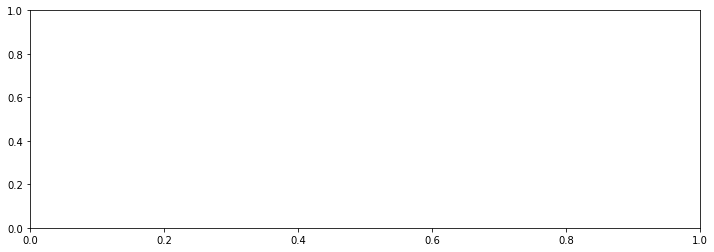

In [25]:
fig, (ax1) = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(12, 4))
ax1.plot(np.asarray(pitchesYIN), color='blue')
plt.title ('Ma-')
plt.xlabel ('Frames')
plt.ylabel ('Freq (Hz)')
plt.ylim(400, 600)